**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plte
import seaborn as sns

**Mount Drive**

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import File From Drive**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIU Sheets and Docs/Academic Tasks/6th Semester/Data Mining/Project With Paper/Heart Attack Predection.csv')
df.head(10)

,age,gender,impulse,high,low,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
7,63,1,60,214,82,87.0,300.00,2.370,1
8,44,0,60,154,81,135.0,2.35,0.004,0
9,67,1,61,160,95,100.0,2.84,0.011,0


**Print Head**

In [4]:
print(df.head())

   age  gender  impulse  high  low  glucose    kcm  troponin  class
0   64       1       66   160   83    160.0   1.80     0.012      0
1   21       1       94    98   46    296.0   6.75     1.060      1
2   55       1       64   160   77    270.0   1.99     0.003      0
3   64       1       70   120   55    270.0  13.87     0.122      1
4   55       1       64   112   65    300.0   1.08     0.003      0


**Print Tail**

In [5]:
df.tail(10)

,age,gender,impulse,high,low,glucose,kcm,troponin,class
1309,47,1,94,105,81,135.0,36.24,0.263,1
1310,70,0,80,135,75,351.0,2.21,10.000,1
1311,85,1,112,115,69,114.0,2.19,0.062,1
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1
1318,51,1,94,157,79,134.0,50.89,1.770,1


**Shape and Information**

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1319 non-null   int64  
 1   gender    1319 non-null   int64  
 2   impulse   1319 non-null   int64  
 3   high      1319 non-null   int64  
 4   low       1319 non-null   int64  
 5   glucose   1319 non-null   float64
 6   kcm       1319 non-null   float64
 7   troponin  1319 non-null   float64
 8   class     1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


**Check NULL Values**

In [7]:
df.isnull().sum()

,0
age,0
gender,0
impulse,0
high,0
low,0
glucose,0
kcm,0
troponin,0
class,0


**Graph- Pie Chart and Bar chart**

<ipython-input-8-35a987a906e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="class", data=df, ax=ax[1], order=risk_order, palette=p_colors)


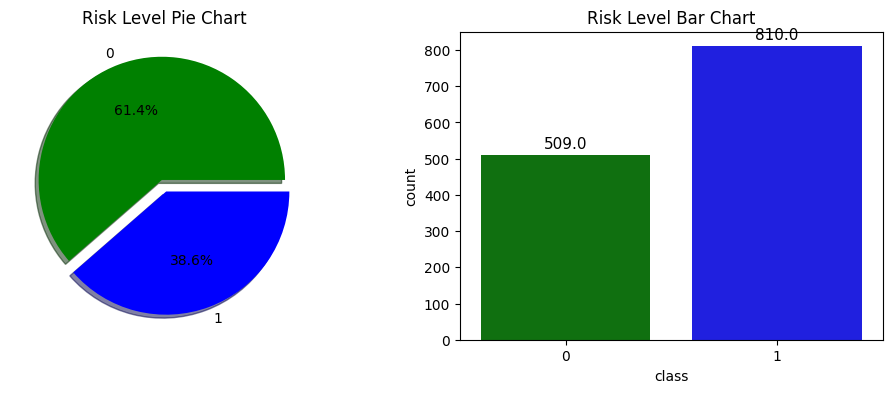

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

p_colors = ['green', 'blue']
risk_order = ['0','1']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["class"].value_counts().plot(kind="pie", labels=risk_order,
        colors=p_colors,explode=[0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="class", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

**Import Libraries**

In [9]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Split Dataset**

In [10]:
x = df.drop("class", axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = split(x, y, test_size=0.20, random_state=1)

**Models Accuracy On Normal Dataset**

In [11]:
# Decision Tree Classifier
print("Decision Tree Classifier")
dt = DecisionTreeClassifier(random_state=50)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print()

# Random Forrest
print("Random Forest Classifier")
rm = RandomForestClassifier(random_state=50)
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print()

# Extra Tree Classification
print("Extra Tree Classifier")
EtC = ExtraTreesClassifier(random_state=50)
EtC.fit(x_train, y_train)
y_pred = EtC.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print()

# SVM Model
print("SVM Classifier")
svc = SVC(random_state=50)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print()

# KNN
print("KNN Classifier")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print()

Decision Tree Classifier
Test Accuracy: 0.9772727272727273
Confusion Matrix: 
[[104   2]
 [  4 154]]

Random Forest Classifier
Test Accuracy: 0.9848484848484849
Confusion Matrix: 
[[105   1]
 [  3 155]]

Extra Tree Classifier
Test Accuracy: 0.9242424242424242
Confusion Matrix: 
[[ 98   8]
 [ 12 146]]

SVM Classifier
Test Accuracy: 0.6553030303030303
Confusion Matrix: 
[[ 20  86]
 [  5 153]]

KNN Classifier
Test Accuracy: 0.6553030303030303
Confusion Matrix: 
[[ 55  51]
 [ 40 118]]



Roc Curve

Decision Tree Classifier
Test Accuracy: 0.9772727272727273
Confusion Matrix: 
[[104   2]
 [  4 154]]
Random Forest Classifier
Test Accuracy: 0.9848484848484849
Confusion Matrix: 
[[105   1]
 [  3 155]]
Extra Tree Classifier
Test Accuracy: 0.9242424242424242
Confusion Matrix: 
[[ 98   8]
 [ 12 146]]
SVM Classifier
Test Accuracy: 0.6553030303030303
Confusion Matrix: 
[[ 20  86]
 [  5 153]]


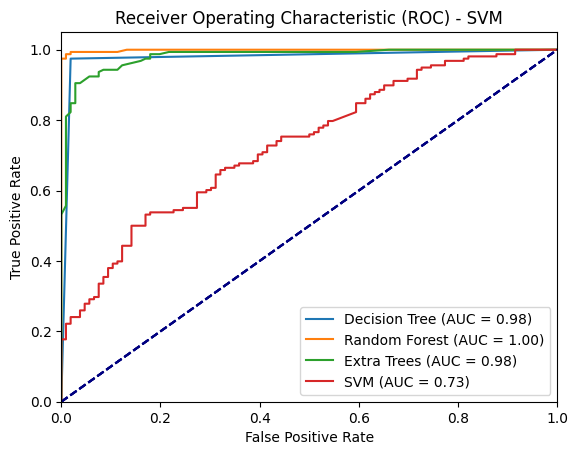

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")

# Decision Tree Classifier
print("Decision Tree Classifier")
dt = DecisionTreeClassifier(random_state=50)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
auc_value = auc(fpr, tpr)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
plot_roc_curve(fpr, tpr, "Decision Tree")

# Random Forest Classifier
print("Random Forest Classifier")
rm = RandomForestClassifier(random_state=50)
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, rm.predict_proba(x_test)[:,1])
auc_value = auc(fpr, tpr)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
plot_roc_curve(fpr, tpr, "Random Forest")

# Extra Trees Classifier
print("Extra Tree Classifier")
EtC = ExtraTreesClassifier(random_state=50)
EtC.fit(x_train, y_train)
y_pred = EtC.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, EtC.predict_proba(x_test)[:,1])
auc_value = auc(fpr, tpr)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
plot_roc_curve(fpr, tpr, "Extra Trees")

# SVM Classifier
print("SVM Classifier")
svc = SVC(random_state=50, probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
auc_value = auc(fpr, tpr)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
plot_roc_curve(fpr, tpr, "SVM")

# Display the plot
plt.show()


**Model Reports**

In [13]:
from sklearn.metrics import classification_report

print("Decision tree report")
print(classification_report(y_test, dt.predict(x_test),zero_division=1))
print()
print("ExtraTreesClassifier")
print(classification_report(y_test, EtC.predict(x_test),zero_division=1))
print()
print("Random forest report")
print(classification_report(y_test, rm.predict(x_test),zero_division=1))
print()
print("SVM Model")
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(x_test),zero_division=1))
print()
print("KNeighborsClassifier")
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(x_test),zero_division=1))

Decision tree report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       106
           1       0.99      0.97      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       106
           1       0.95      0.92      0.94       158

    accuracy                           0.92       264
   macro avg       0.92      0.92      0.92       264
weighted avg       0.93      0.92      0.92       264


Random forest report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.99      0.98      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.99      0.98       264
weighted 

**Confusion Matrix for all the Models**

Confusion matrix of decision tree


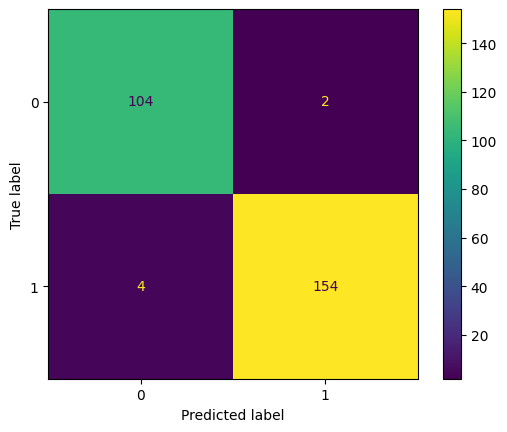

Confusion matrix of Random forest


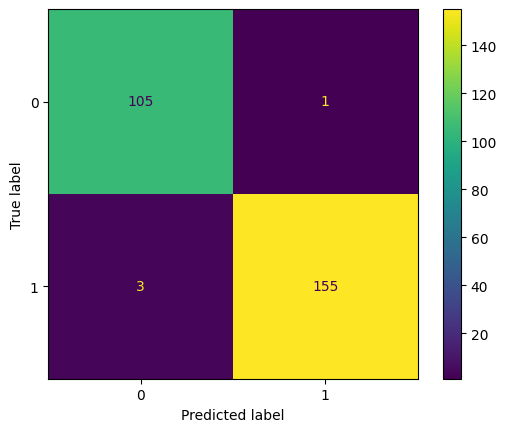

ExtraTreesClassifier


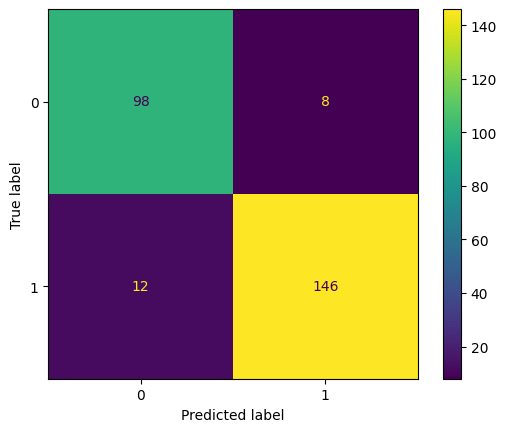

SVM Model


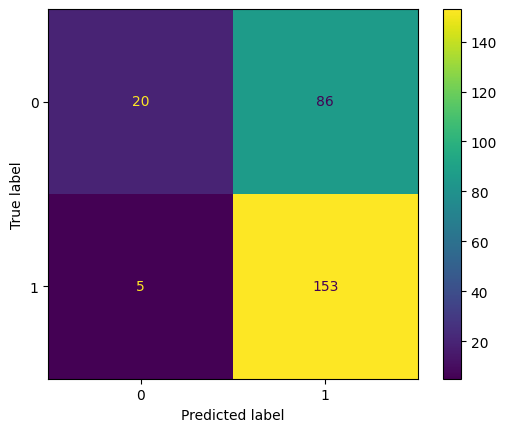

KNeighborsClassifier


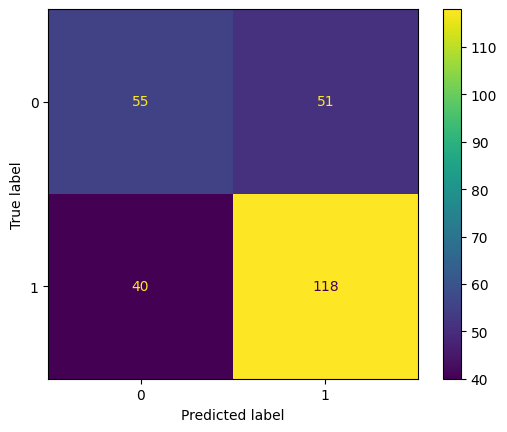

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Confusion matrix of decision tree")
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

print("Confusion matrix of Random forest")
y_pred = rm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rm.classes_)
disp.plot()
plt.show()

print("ExtraTreesClassifier")
y_pred = EtC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  ExtraTreesClassifier matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=EtC.classes_)
disp.plot()
plt.show()

print("SVM Model")
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

print("KNeighborsClassifier")
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

**Finding Outlier**

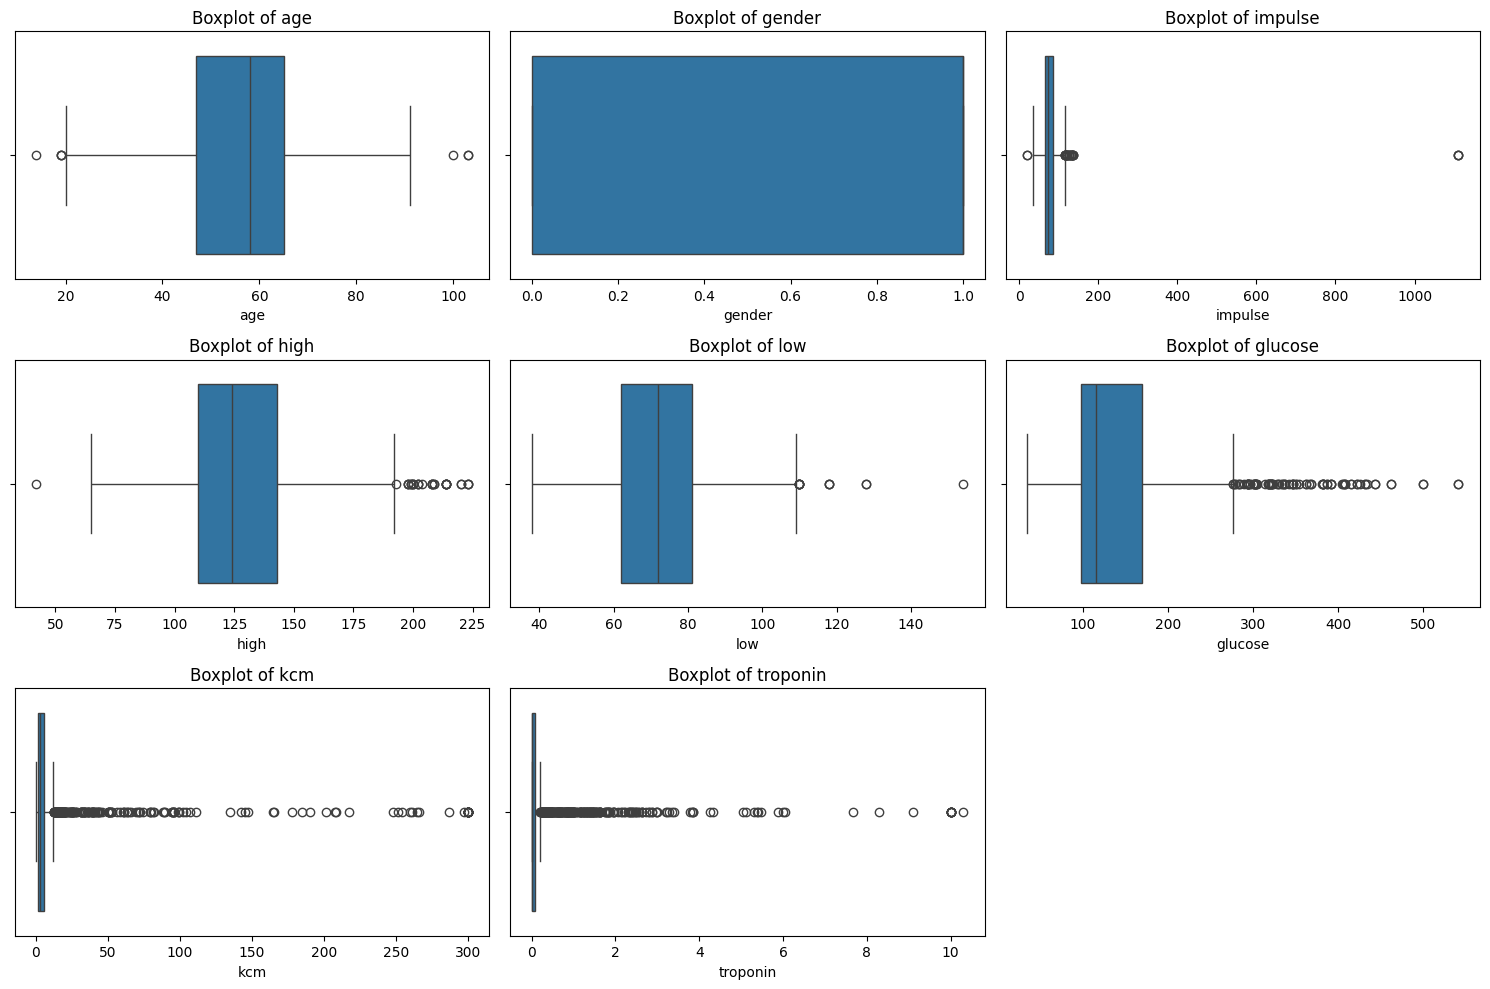

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Finding Columns with Outlier**

In [16]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(x)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['age', 'impulse', 'high', 'low', 'glucose', 'kcm', 'troponin']


**Count Number of Outliers in Columns**

In [17]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(x)

# Display the columns with the most outliers
print(outlier_counts_df)


     Column  Outlier Count
7  troponin            257
6       kcm            205
5   glucose             92
3      high             32
2   impulse             30
4       low             12
0       age              7
1    gender              0


**Capping Outliers**

In [18]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
X = cap_outliers(x, columns_with_outliers)


**Finding Number of Outliers after Capping**

In [19]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(X)

# Display the columns with the most outliers
print(outlier_counts_df)


     Column  Outlier Count
0       age              0
1    gender              0
2   impulse              0
3      high              0
4       low              0
5   glucose              0
6       kcm              0
7  troponin              0


**Models Accuracy After Capping**

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


# Assuming 'df' is your DataFrame containing the data
# ... (Load your data into 'df' here) ...

# Split data into features (X) and target (y)
x = df.drop("class", axis=1)
y = df["class"]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(x_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(x_test)
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# ExtraTreesClassifier
etc_model = ExtraTreesClassifier(random_state=1)
etc_model.fit(x_train_smote, y_train_smote)
y_pred_etc = etc_model.predict(x_test)
print("\nExtraTreesClassifier:")
print(classification_report(y_test, y_pred_etc))
print("Accuracy:", accuracy_score(y_test, y_pred_etc))

# SVM Model
svc_model = SVC(random_state=50)
svc_model.fit(x_train_smote, y_train_smote)
y_pred_svc = svc_model.predict(x_test)
print("\nSVM Model:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.99      0.98      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.99      0.98       264
weighted avg       0.99      0.98      0.98       264

Accuracy: 0.9848484848484849

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.99      0.97      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Accuracy: 0.9810606060606061

ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       106
           1       0.93      0.89      0.91       158

    accuracy                           0.89     

**Boxplot After Capping**

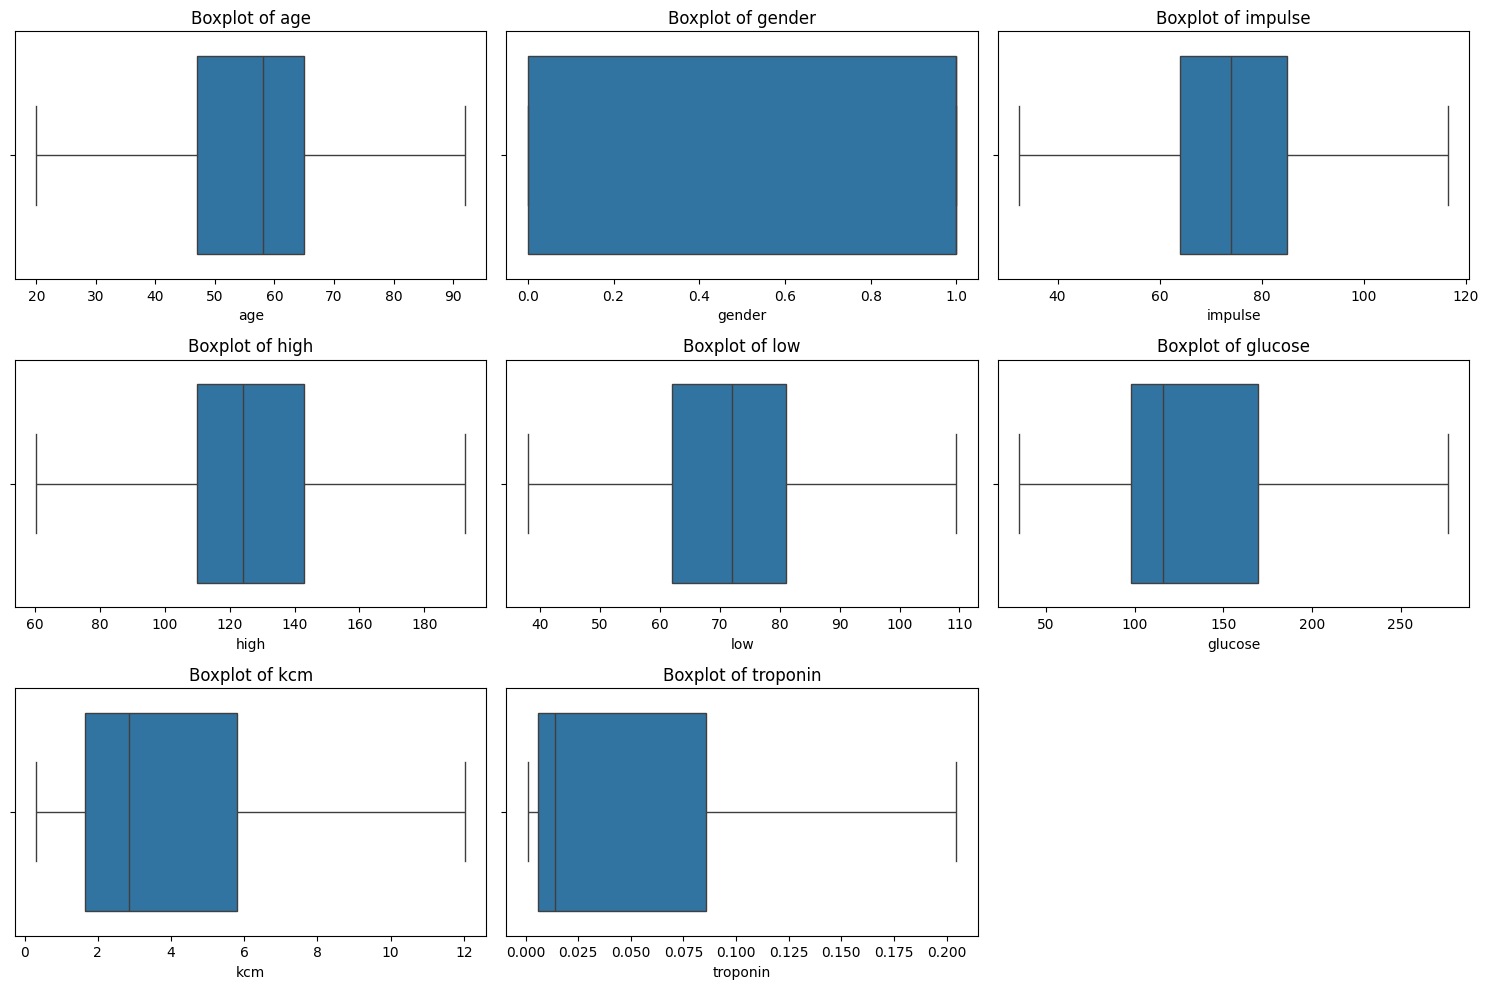

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Smote Dataset**

**Smote Type-1**

In [22]:
# Apply Random Oversampler to the training data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)

**Smote Type-2**

In [23]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=1)
x_train_smote, y_train_smote = adasyn.fit_resample(x_train, y_train)

**Smote Type-3**

In [24]:
# Apply SMOTETomek to the training data
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)

**Smote type-4**

In [25]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

**Charts After Smoting**

<ipython-input-26-24d994e3b161>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])


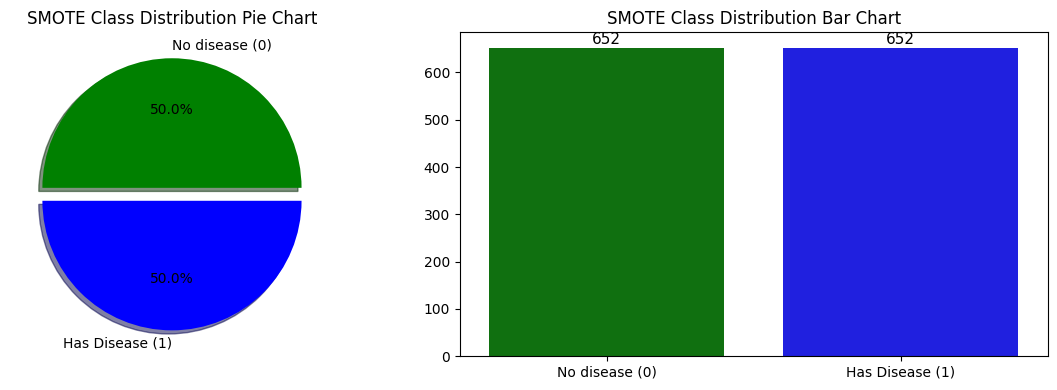

In [26]:
from collections import Counter

# Get the distribution of the resampled data
smote_counts = Counter(y_train_smote)

#  Prepare class data after SMOTE
smote_class_counts = [smote_counts[0], smote_counts[1]]
smote_class_order = ["No disease (0)", "Has Disease (1)"]

class_colors = ['green', 'blue']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for SMOTE-applied Class distribution
ax[0].pie(smote_class_counts,
          labels=smote_class_order,
          colors=class_colors,
          explode=[0.05, 0.05],
          autopct='%1.1f%%',
          shadow=True)
ax[0].set_title("SMOTE Class Distribution Pie Chart")
ax[0].set_ylabel('')

# Bar chart for SMOTE-applied Class distribution
sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])

for i, bar in enumerate(ax[1].patches):
    ax[1].annotate(f'{smote_class_counts[i]}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=11, xytext=(0, 6),
                   textcoords='offset points')

ax[1].set_title("SMOTE Class Distribution Bar Chart")

# Show the plot
plt.tight_layout()
plt.show()

**Check Models Accuracy After Smote**

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.99      0.98      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.99      0.98       264
weighted avg       0.99      0.98      0.98       264

Accuracy: 0.9848484848484849
Confusion Matrix for Decision Tree:
[[105   1]
 [  3 155]]


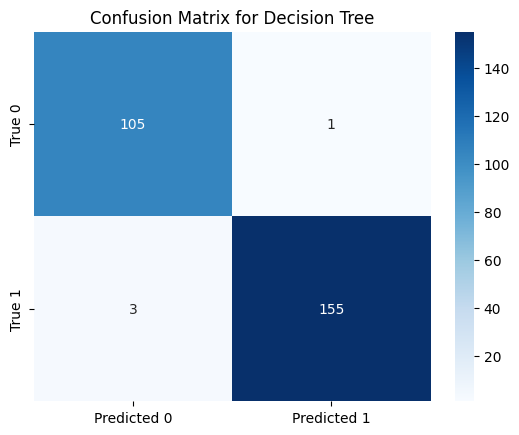


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.99      0.97      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Accuracy: 0.9810606060606061
Confusion Matrix for Random Forest:
[[105   1]
 [  4 154]]


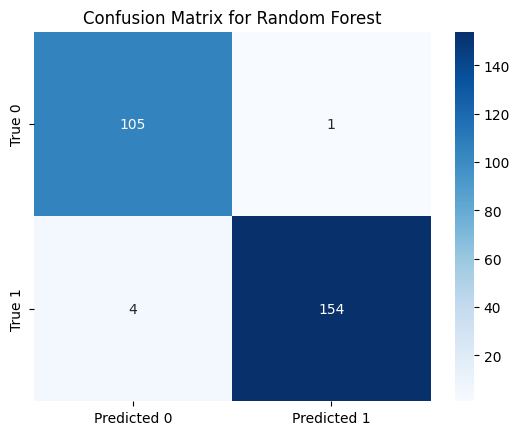


Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       106
           1       0.93      0.89      0.91       158

    accuracy                           0.89       264
   macro avg       0.88      0.89      0.89       264
weighted avg       0.89      0.89      0.89       264

Accuracy: 0.8901515151515151
Confusion Matrix for Extra Trees Classifier:
[[ 95  11]
 [ 18 140]]


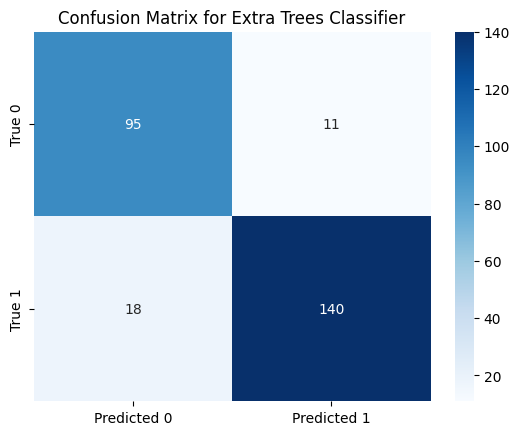


SVM Model:
              precision    recall  f1-score   support

           0       0.54      0.75      0.63       106
           1       0.77      0.58      0.66       158

    accuracy                           0.65       264
   macro avg       0.66      0.66      0.65       264
weighted avg       0.68      0.65      0.65       264

Accuracy: 0.6477272727272727
Confusion Matrix for SVM:
[[79 27]
 [66 92]]


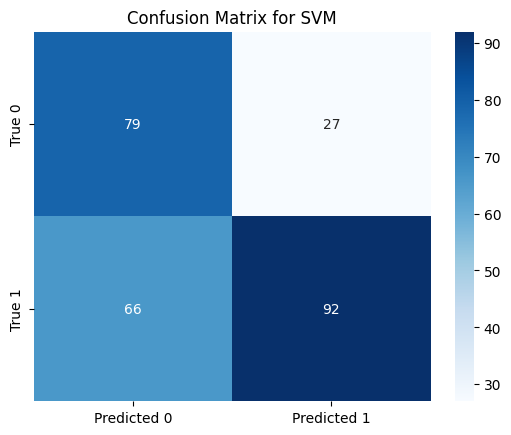

In [27]:
# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ExtraTreesClassifier
etc_model = ExtraTreesClassifier(random_state=1)
etc_model.fit(x_train_smote, y_train_smote)

y_pred_etc = etc_model.predict(x_test)

# Evaluate Extra Trees Classifier
print("\nExtra Trees Classifier:")
print(classification_report(y_test, y_pred_etc))
print("Accuracy:", accuracy_score(y_test, y_pred_etc))

# Confusion Matrix for Extra Trees Classifier
cm_etc = confusion_matrix(y_test, y_pred_etc)
print("Confusion Matrix for Extra Trees Classifier:")
print(cm_etc)
sns.heatmap(cm_etc, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()

# SVM Model
svc_model = SVC(random_state=50)
svc_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_svc = svc_model.predict(x_test)

# Evaluate SVM
print("\nSVM Model:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

# Confusion Matrix for SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVM:")
print(cm_svc)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for SVM')
plt.show()


**ROC Curve**

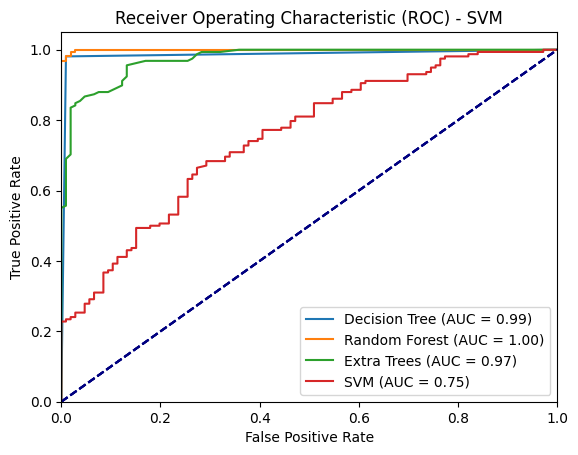

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name, auc_value):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")

# Decision Tree Classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(x_test)[:,1])
auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, "Decision Tree", auc_dt)

# Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest", auc_rf)

# Extra Trees Classifier
fpr_etc, tpr_etc, _ = roc_curve(y_test, etc_model.predict_proba(x_test)[:,1])
auc_etc = auc(fpr_etc, tpr_etc)
plot_roc_curve(fpr_etc, tpr_etc, "Extra Trees", auc_etc)

# SVM Model
svc_model = SVC(probability=True, random_state=50)  # or any random_state you prefer
svc_model.fit(x_train_smote, y_train_smote)  # Fit the model to your training data

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_model.predict_proba(x_test)[:,1])
auc_svc = auc(fpr_svc, tpr_svc)
plot_roc_curve(fpr_svc, tpr_svc, "SVM", auc_svc)  # Assuming you have a plot_roc_curve function

# Display the plot
plt.show()


**Feature Selection**

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=5)
x_train_anova = anova_selector.fit_transform(x_train, y_train)
x_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=5)
x_train_chi2 = chi2_selector.fit_transform(x_train, y_train)
x_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
x_train_rfe = rfe_selector.fit_transform(x_train, y_train)
x_test_rfe = rfe_selector.transform(x_test)

# Initialize results storage
results = []

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'SVM': SVC()
}

# Define feature sets for evaluation
feature_sets = {
    'ANOVA': (x_train_anova, x_test_anova),
    'Chi-Square': (x_train_chi2, x_test_chi2),
    'RFE': (x_train_rfe, x_test_rfe)
}

# Train and evaluate models
for feature_name, (x_train_fs, x_test_fs) in feature_sets.items():
    for model_name, model in models.items():
        # Train the model
        model.fit(x_train_fs, y_train)
        # Predict and calculate accuracy
        y_pred = model.predict(x_test_fs)
        accuracy = accuracy_score(y_test, y_pred)
        # Store results
        results.append({
            'Model': f"{model_name} ({feature_name})",
            'Accuracy': accuracy
        })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                         Model  Accuracy
0        Random Forest (ANOVA)  0.981061
1        Decision Tree (ANOVA)  0.988636
2          Extra Trees (ANOVA)  0.962121
3                  SVM (ANOVA)  0.685606
4   Random Forest (Chi-Square)  0.988636
5   Decision Tree (Chi-Square)  0.988636
6     Extra Trees (Chi-Square)  0.962121
7             SVM (Chi-Square)  0.685606
8          Random Forest (RFE)  0.981061
9          Decision Tree (RFE)  0.977273
10           Extra Trees (RFE)  0.965909
11                   SVM (RFE)  0.685606


**ROC Curve**

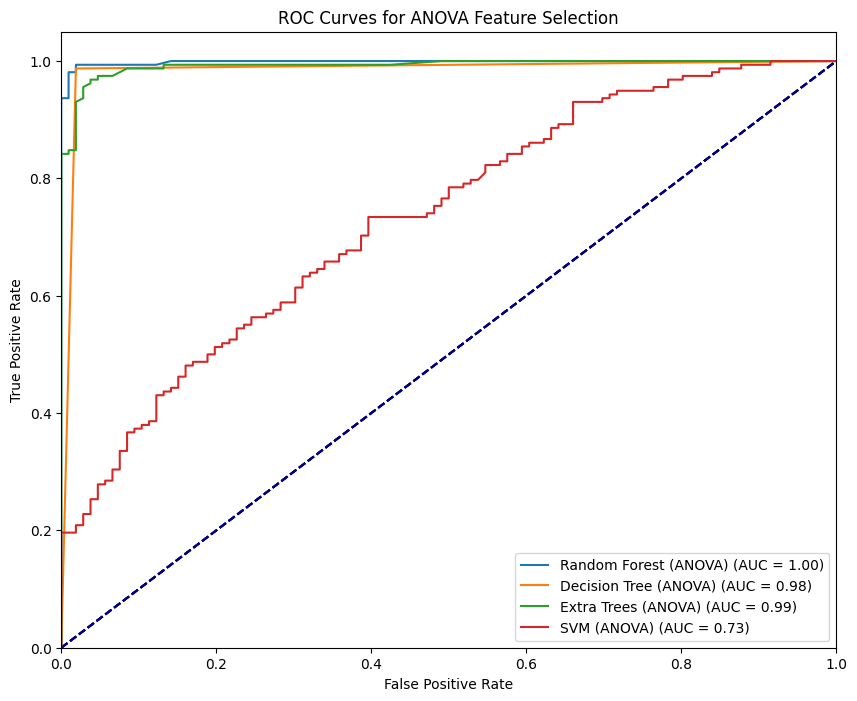

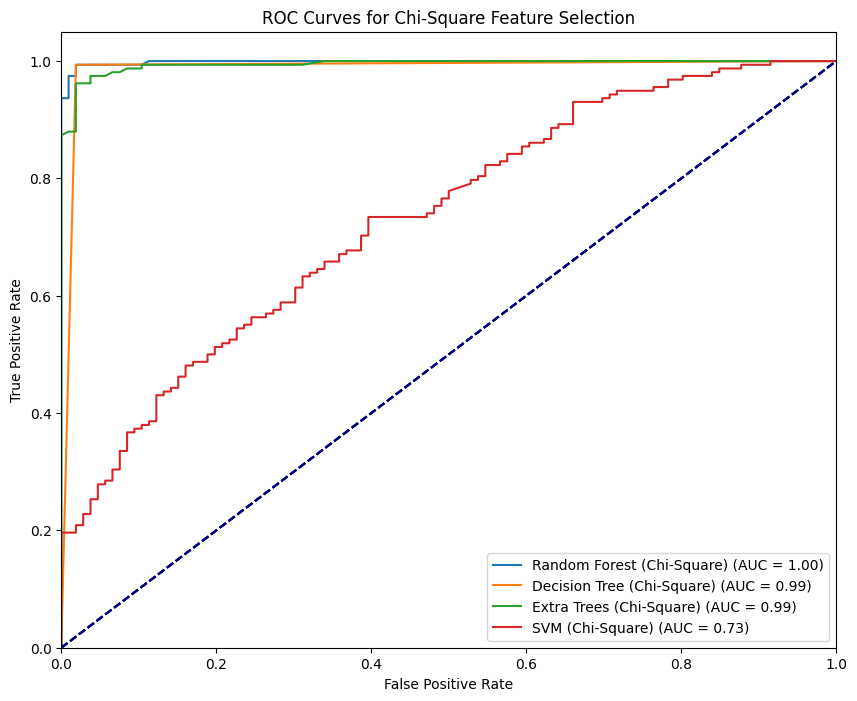

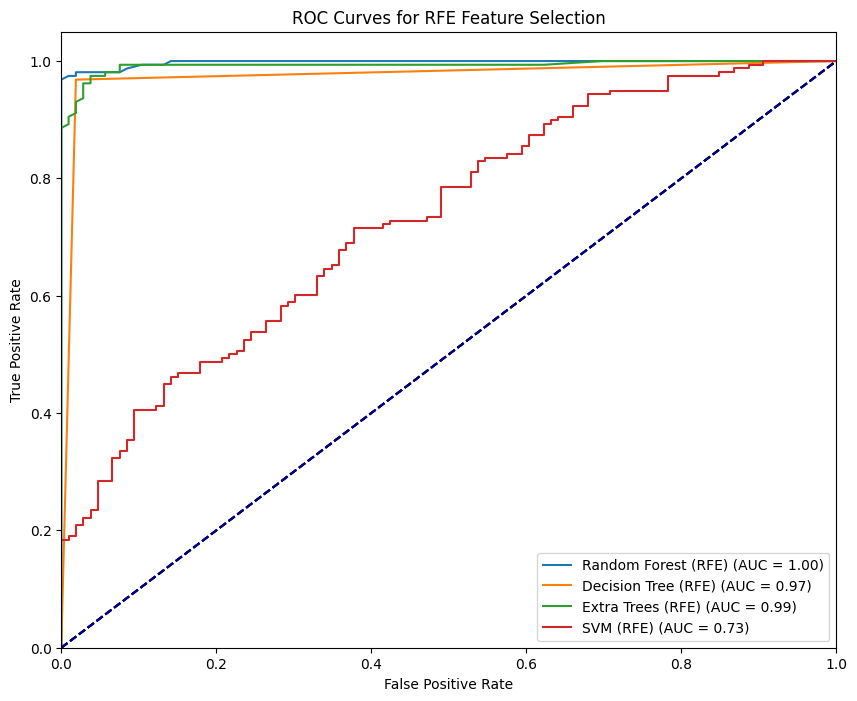

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name, auc_value):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'SVM': SVC(probability=True)  # SVM needs probability=True for ROC curve
}

# Define feature sets for evaluation
feature_sets = {
    'ANOVA': (x_train_anova, x_test_anova),
    'Chi-Square': (x_train_chi2, x_test_chi2),
    'RFE': (x_train_rfe, x_test_rfe)
}

# Loop through the feature sets
for feature_name, (x_train_fs, x_test_fs) in feature_sets.items():
    plt.figure(figsize=(10, 8))  # Create a new figure for each feature set

    # Loop through each model
    for model_name, model in models.items():
        # Train the model
        model.fit(x_train_fs, y_train)

        # Predict probabilities (needed for ROC curve)
        y_prob = model.predict_proba(x_test_fs)[:, 1]  # Get probabilities for the positive class

        # Calculate ROC curve values
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_value = auc(fpr, tpr)

        # Plot the ROC curve for the model
        plot_roc_curve(fpr, tpr, f"{model_name} ({feature_name})", auc_value)

    # Display the ROC curve for all models with the current feature set
    plt.title(f'ROC Curves for {feature_name} Feature Selection')
    plt.show()


**Confusion Matrix of all the Models**

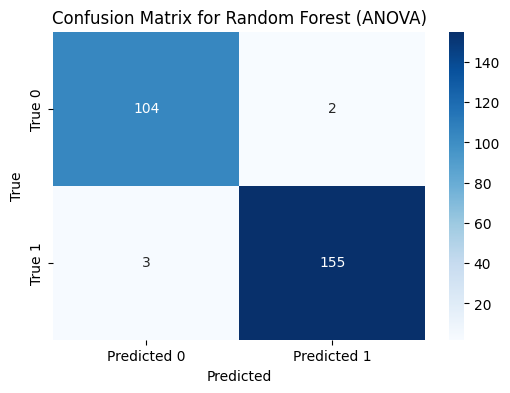

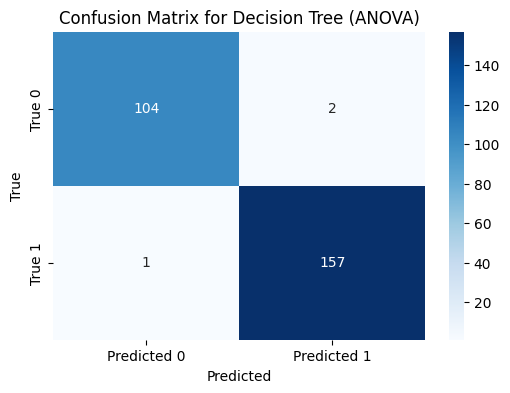

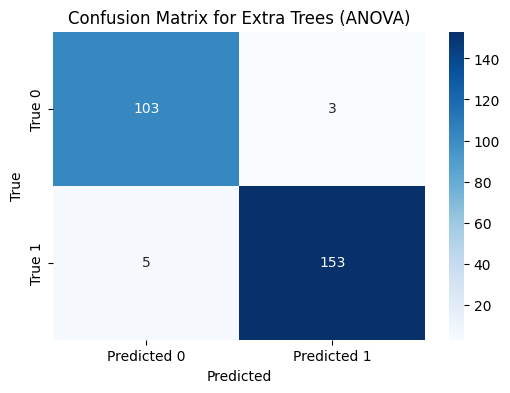

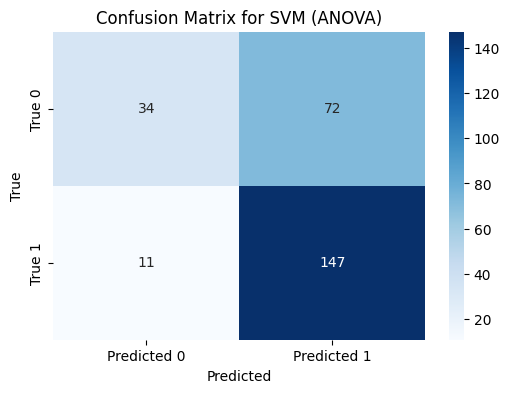

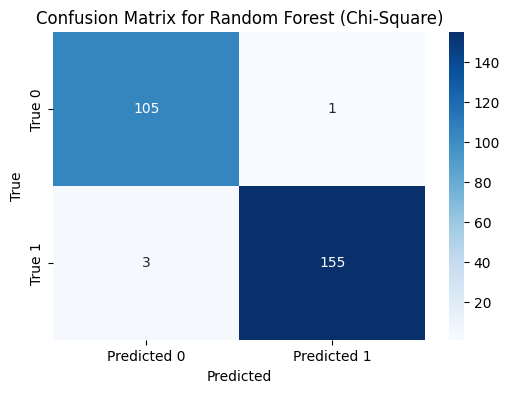

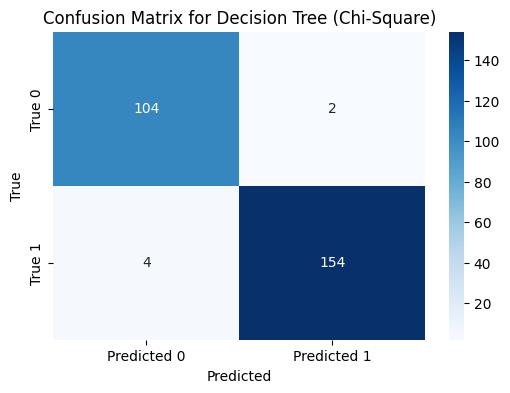

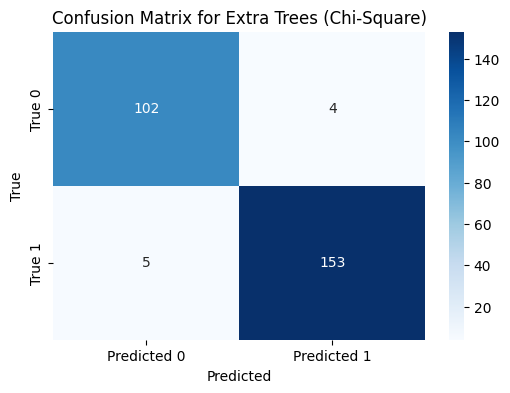

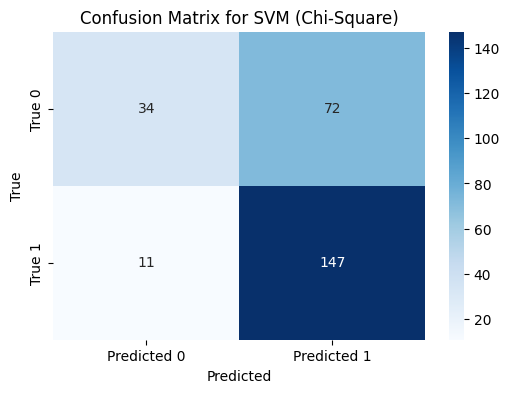

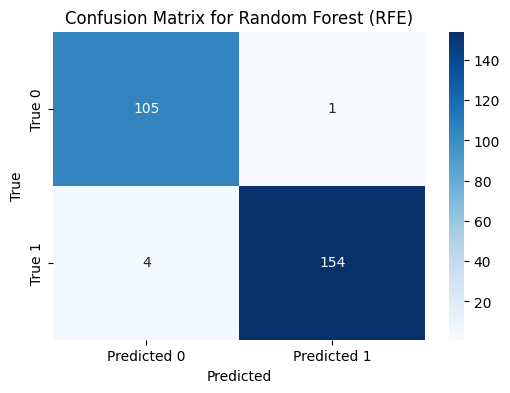

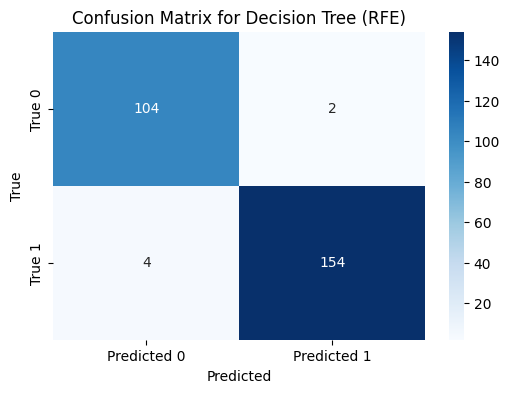

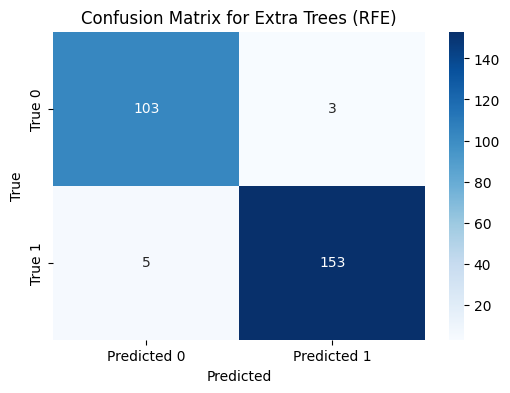

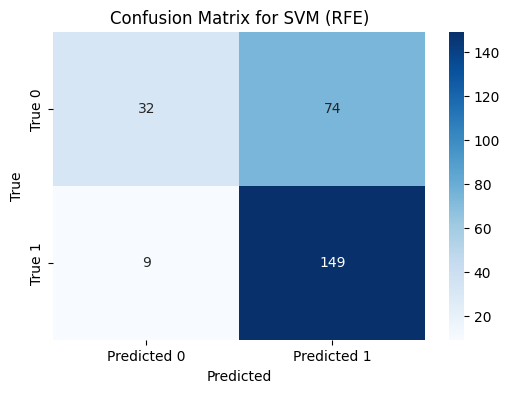

                         Model  Accuracy
0        Random Forest (ANOVA)  0.981061
1        Decision Tree (ANOVA)  0.988636
2          Extra Trees (ANOVA)  0.969697
3                  SVM (ANOVA)  0.685606
4   Random Forest (Chi-Square)  0.984848
5   Decision Tree (Chi-Square)  0.977273
6     Extra Trees (Chi-Square)  0.965909
7             SVM (Chi-Square)  0.685606
8          Random Forest (RFE)  0.981061
9          Decision Tree (RFE)  0.977273
10           Extra Trees (RFE)  0.969697
11                   SVM (RFE)  0.685606


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=5)
x_train_anova = anova_selector.fit_transform(x_train, y_train)
x_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=5)
x_train_chi2 = chi2_selector.fit_transform(x_train, y_train)
x_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
x_train_rfe = rfe_selector.fit_transform(x_train, y_train)
x_test_rfe = rfe_selector.transform(x_test)

# Initialize results storage
results = []

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'SVM': SVC()
}

# Define feature sets for evaluation
feature_sets = {
    'ANOVA': (x_train_anova, x_test_anova),
    'Chi-Square': (x_train_chi2, x_test_chi2),
    'RFE': (x_train_rfe, x_test_rfe)
}

# Train and evaluate models
for feature_name, (x_train_fs, x_test_fs) in feature_sets.items():
    for model_name, model in models.items():
        # Train the model
        model.fit(x_train_fs, y_train)
        # Predict and calculate accuracy
        y_pred = model.predict(x_test_fs)
        accuracy = accuracy_score(y_test, y_pred)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
        plt.title(f'Confusion Matrix for {model_name} ({feature_name})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Store results
        results.append({
            'Model': f"{model_name} ({feature_name})",
            'Accuracy': accuracy
        })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


**Select Features**

In [32]:
# Get feature names
feature_names = x.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': anova_selected_features_list,
    'Chi-Square': chi2_selected_features_list,
    'RFE': rfe_selected_features_list
})

# Display the dataframe
print(selected_features_df)

      ANOVA Chi-Square       RFE
0       age        age       age
1    gender     gender      high
2   glucose    glucose   glucose
3       kcm        kcm       kcm
4  troponin   troponin  troponin


**Heat Map**

<Axes: >

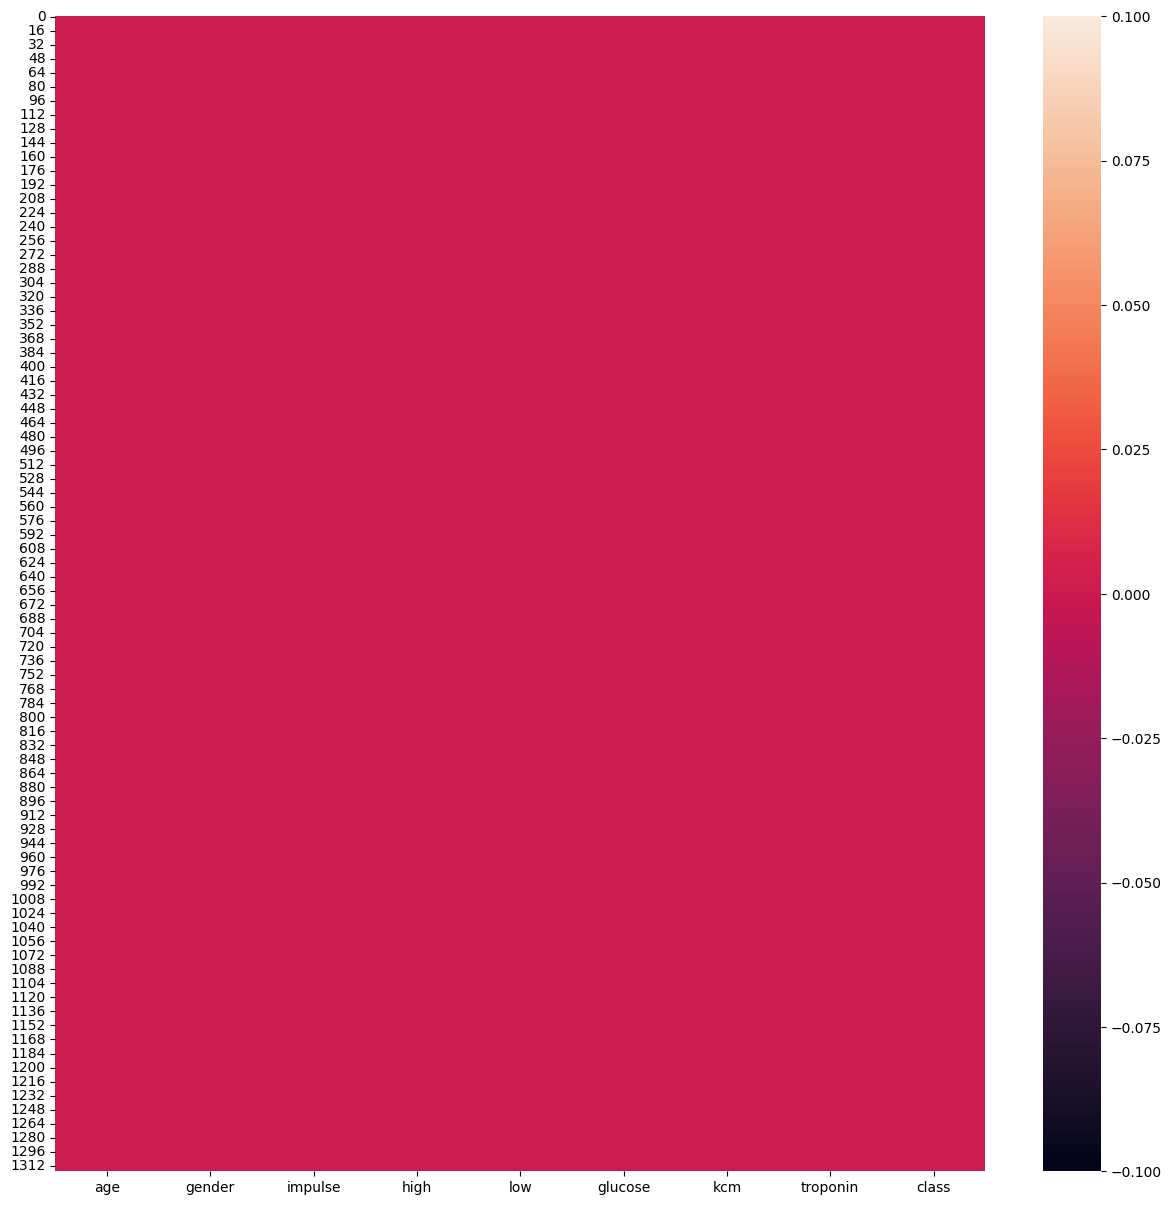

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

**NULL in Columns**

In [34]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

,0
age,0.0
gender,0.0
impulse,0.0
high,0.0
low,0.0
glucose,0.0
kcm,0.0
troponin,0.0
class,0.0


**Sum of NULL in Row and Col**

In [35]:
df.isnull().sum().sum()

0

**Dataframes: Value Ranges for each Columns**

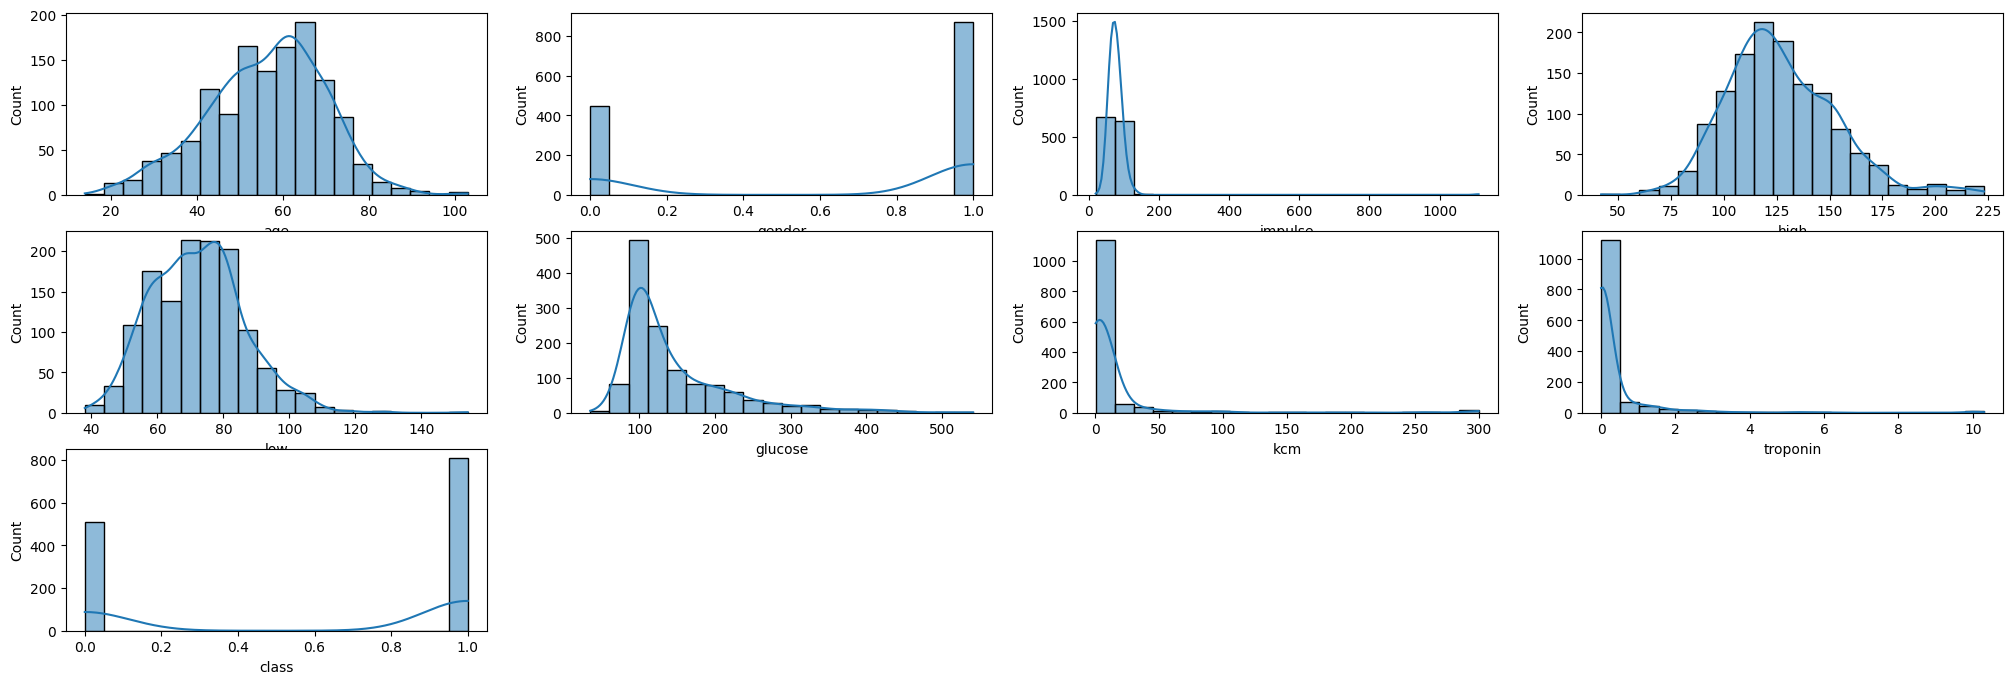

In [36]:
num_var=df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(25, 25))
for i, var in enumerate(num_var):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df[var], bins=20, kde=True)

**Scatter Plot Diagram**

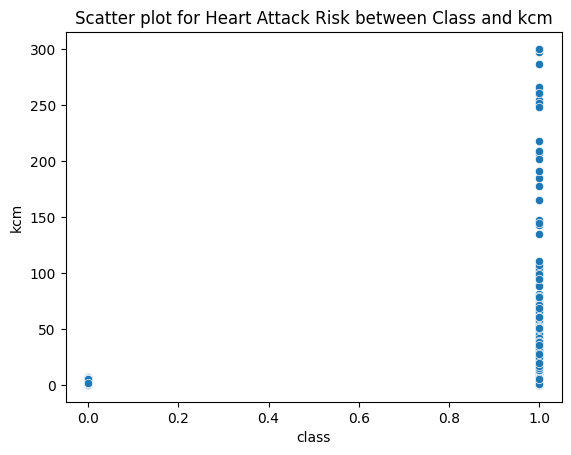

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Bp (Blood Pressure) and Hemo (Hemoglobin)
sns.scatterplot(x='class', y='kcm', data=df)

# Adding title and labels
plt.title('Scatter plot for Heart Attack Risk between Class and kcm')
plt.xlabel('class')
plt.ylabel('kcm')

# Show the plot
plt.show()

**Hyper parameter**

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV instance with the Random Forest model
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Step 4: Evaluate the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the best parameters and evaluation results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.98
Confusion Matrix:
 [[105   1]
 [  3 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.99      0.98      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.99      0.98       264
weighted avg       0.99      0.98      0.98       264



**Cross Validation**

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

# Dataset preparation (replace 'df' with your dataset)
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable

# Feature selection: Chi-Square with k=5 (adjust k as needed)
chi2_selector = SelectKBest(chi2, k=5)

# SMOTE for class balancing
smote = SMOTE(random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline with Chi-Square feature selection, SMOTE, and Decision Tree
pipeline = Pipeline([
    ('chi2', chi2_selector),
    ('smote', smote),
    ('classifier', dt_classifier)
])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
conf_matrices = []
accuracies = []
y_true_all = []
y_pred_all = []

# Perform cross-validation manually to integrate SMOTE within each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training data within each fold
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Apply Chi-Square feature selection
    X_train_selected = chi2_selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = chi2_selector.transform(X_test)

    # Train the Decision Tree Classifier
    dt_classifier.fit(X_train_selected, y_train_resampled)

    # Predict on the test fold
    y_pred = dt_classifier.predict(X_test_selected)

    # Store results
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Aggregate metrics
overall_conf_matrix = confusion_matrix(y_true_all, y_pred_all)
overall_class_report = classification_report(y_true_all, y_pred_all)
mean_accuracy = np.mean(accuracies)

# Print results
print("Confusion Matrix (Aggregated):\n", overall_conf_matrix)
print("\nClassification Report (Aggregated):\n", overall_class_report)
print("\nMean Cross-Validation Accuracy:", mean_accuracy)


Confusion Matrix (Aggregated):
 [[496  13]
 [ 14 796]]

Classification Report (Aggregated):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       509
           1       0.98      0.98      0.98       810

    accuracy                           0.98      1319
   macro avg       0.98      0.98      0.98      1319
weighted avg       0.98      0.98      0.98      1319


Mean Cross-Validation Accuracy: 0.9795339324807006


**Ensemble**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
svm_model = SVC(probability=True, random_state=1)

# Combine the models in a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate the ensemble model
print("\nEnsemble Model (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))


Ensemble Model (Voting Classifier):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.99      0.99      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Accuracy: 0.9848484848484849


**Save Model**

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Save the trained model
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

**Testing Model**

**Test-1**

In [ ]:
print(df.head(1))
print()

import joblib
import pandas as pd

# 1. Load the model
model = joblib.load("random_forest_model.pkl")

# 2. Load or recreate training data
# ... (Your code to load or prepare x_train and y_train) ...

# 3. Fit the model (This is the crucial step)
model.fit(x_train, y_train)

# 4. Now make predictions
input_data = [[64, 1, 66, 160, 83, 160.0, 1.8,0.012]]
prediction = model.predict(input_data)[0]
print("Prediction:", prediction)


   age  gender  impulse  high  low  glucose  kcm  troponin  class
0   64       1       66   160   83    160.0  1.8     0.012      0

Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Test-2**

In [ ]:
print(df.tail(1))
print()
import joblib
import pandas as pd

# 1. Load the model
model = joblib.load("random_forest_model.pkl")

# 2. Load or recreate training data
# ... (Your code to load or prepare x_train and y_train) ...

# 3. Fit the model (This is the crucial step)
model.fit(x_train, y_train)

# 4. Now make predictions
input_data = [[51, 1, 94, 157, 79, 134.0, 50.89,1.77]]
prediction = model.predict(input_data)[0]
print("Prediction:", prediction)

      age  gender  impulse  high  low  glucose    kcm  troponin  class
1318   51       1       94   157   79    134.0  50.89      1.77      1

Prediction: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
